In [142]:
import numpy as np
from analysis.dataset import Dataset

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn import neural_network
from sklearn.grid_search import GridSearchCV

import pandas as pd

/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
dataset_path = 'Dataset/prueba2.csv'
data = pd.read_csv(dataset_path, index_col=0)

In [132]:
X = data.iloc[:,:-1].values
y = data.label.values

In [133]:
from scipy.stats import gmean
    
def perplexity(estimator, X, y):
    likelihoods = [p if t == 1.0 else 1-p for (t, p) in zip(y, estimator.predict_proba(X).T[1])]
    return gmean(likelihoods)

In [291]:
feature_normalization = StandardScaler()
feature_selection = SelectKBest(f_classif, k=30)
classifier = LogisticRegression()
nn = neural_network.multilayer_perceptron.MLPClassifier()
cl = svm.SVC()
pipeline = Pipeline([
    ('preprocessing', feature_normalization),
    ('feature-selection', feature_selection),
    ('classifier', nn)
])


Cs = np.logspace(-3, 3, 7)
pipelineOptimalC = GridSearchCV(
    estimator=pipeline,
    scoring=perplexity,
    param_grid={
        'classifier__C': Cs
    }
)

In [283]:
cross_val_score(pipeline, X, y, cv=10).mean()

0.84095382833984655

In [294]:
pipelineOptimalC = pipeline.fit(X, y)
classifierOptimalC = pipelineOptimalC.named_steps['classifier']
optimalFeatureSelection = pipelineOptimalC.named_steps['feature-selection']



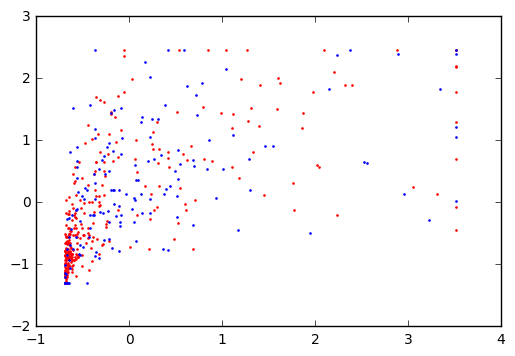

In [298]:
%matplotlib inline
import matplotlib.pyplot as plt
Xt = pipelineOptimalC.named_steps['preprocessing'].transform(X)
plt.scatter(Xt[y == 'EP', 10], Xt[y == 'EP', 50], .8, color='red')
plt.scatter(Xt[y == 'NEP', 10], Xt[y == 'NEP', 50], .8, color='blue')

# Linear Discriminant analysis

In [10]:
lda = sk.lda.LDA

In [13]:
p.Pipeline?